<a href="https://colab.research.google.com/github/anand8698/Indicraft_vintage/blob/main/Data_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# EDA(Exploratory data analysis)

In [4]:
df=pd.read_excel('/content/Copy of Property_Price_Train_Cleaned (1).xlsx')


In [ ]:
df.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,...,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,RLD,65.0,8450,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RLD,80.0,9600,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RLD,68.0,11250,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RLD,60.0,9550,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RLD,84.0,14260,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Summary statistics for numerical features
summary_stats = df.describe()

# Identifying missing values
missing_values = df.isnull().sum()

summary_stats, missing_values


(                Id  Building_Class   Lot_Extent       Lot_Size  \
 count  1459.000000     1459.000000  1200.000000    1459.000000   
 mean    730.000000       56.922550    70.045833   10517.225497   
 std     421.321334       42.304033    24.294456    9984.675721   
 min       1.000000       20.000000    21.000000    1300.000000   
 25%     365.500000       20.000000    59.000000    7549.000000   
 50%     730.000000       50.000000    69.000000    9477.000000   
 75%    1094.500000       70.000000    80.000000   11603.000000   
 max    1459.000000      190.000000   313.000000  215245.000000   
 
        Overall_Material  House_Condition  Construction_Year  Remodel_Year  \
 count       1459.000000      1459.000000        1459.000000   1459.000000   
 mean           6.100069         5.575051        1971.272104   1984.879369   
 std            1.383171         1.113125          30.212814     20.645927   
 min            1.000000         1.000000        1872.000000   1950.000000   
 25% 

In [6]:
df.tail()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,...,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
1454,1455,20,FVR,62.0,7500,Paved,Paved,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RLD,62.0,7917,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RLD,85.0,13175,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RLD,66.0,9042,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RLD,68.0,9717,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Finding missing or null values.

In [7]:
# Display basic statistics of the dataset
df_description = df.describe(include='all')

# Identify columns with missing values and their proportions
missing_values = df.isnull().sum()
missing_values_percentage = (missing_values / len(df)) * 100

df_description, missing_values_percentage[missing_values_percentage > 0]


(                 Id  Building_Class Zoning_Class   Lot_Extent       Lot_Size  \
 count   1459.000000     1459.000000         1459  1200.000000    1459.000000   
 unique          NaN             NaN            5          NaN            NaN   
 top             NaN             NaN          RLD          NaN            NaN   
 freq            NaN             NaN         1150          NaN            NaN   
 mean     730.000000       56.922550          NaN    70.045833   10517.225497   
 std      421.321334       42.304033          NaN    24.294456    9984.675721   
 min        1.000000       20.000000          NaN    21.000000    1300.000000   
 25%      365.500000       20.000000          NaN    59.000000    7549.000000   
 50%      730.000000       50.000000          NaN    69.000000    9477.000000   
 75%     1094.500000       70.000000          NaN    80.000000   11603.000000   
 max     1459.000000      190.000000          NaN   313.000000  215245.000000   
 
        Road_Type Lane_Typ

# Visualize the distribution of sale prices and explore correlations between numerical features and sale prices

# Visulization of the impact of some categorical features on sale prices through visualizations. We'll focus on features like(Zoning_Class, Road_Type, Property_Shape, and Sale_Condition)

# Visualizations to identify key trends and insights, focusing on the relationship between the sale price and other variables.

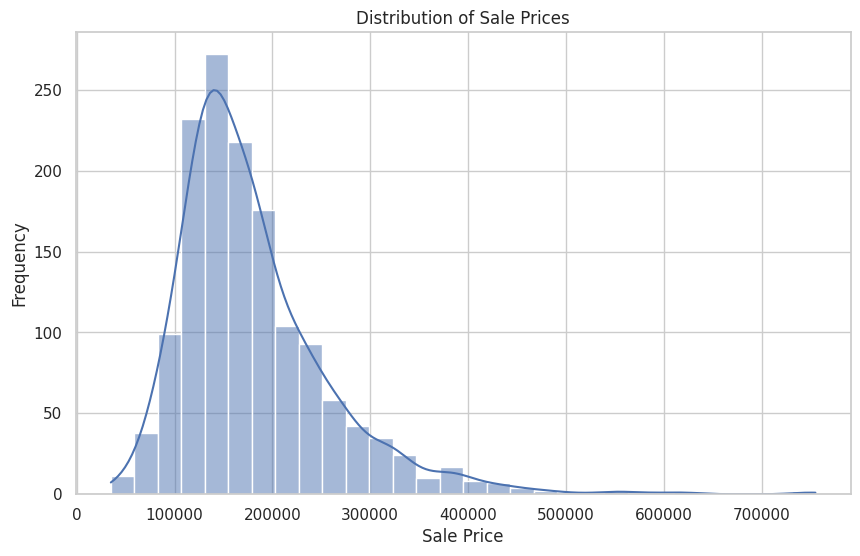

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas for data manipulation

# Setting the visual aesthetics of the plots
sns.set(style="whitegrid")

# Visualize the distribution of Sale Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Sale_Price'], kde=True, bins=30)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()



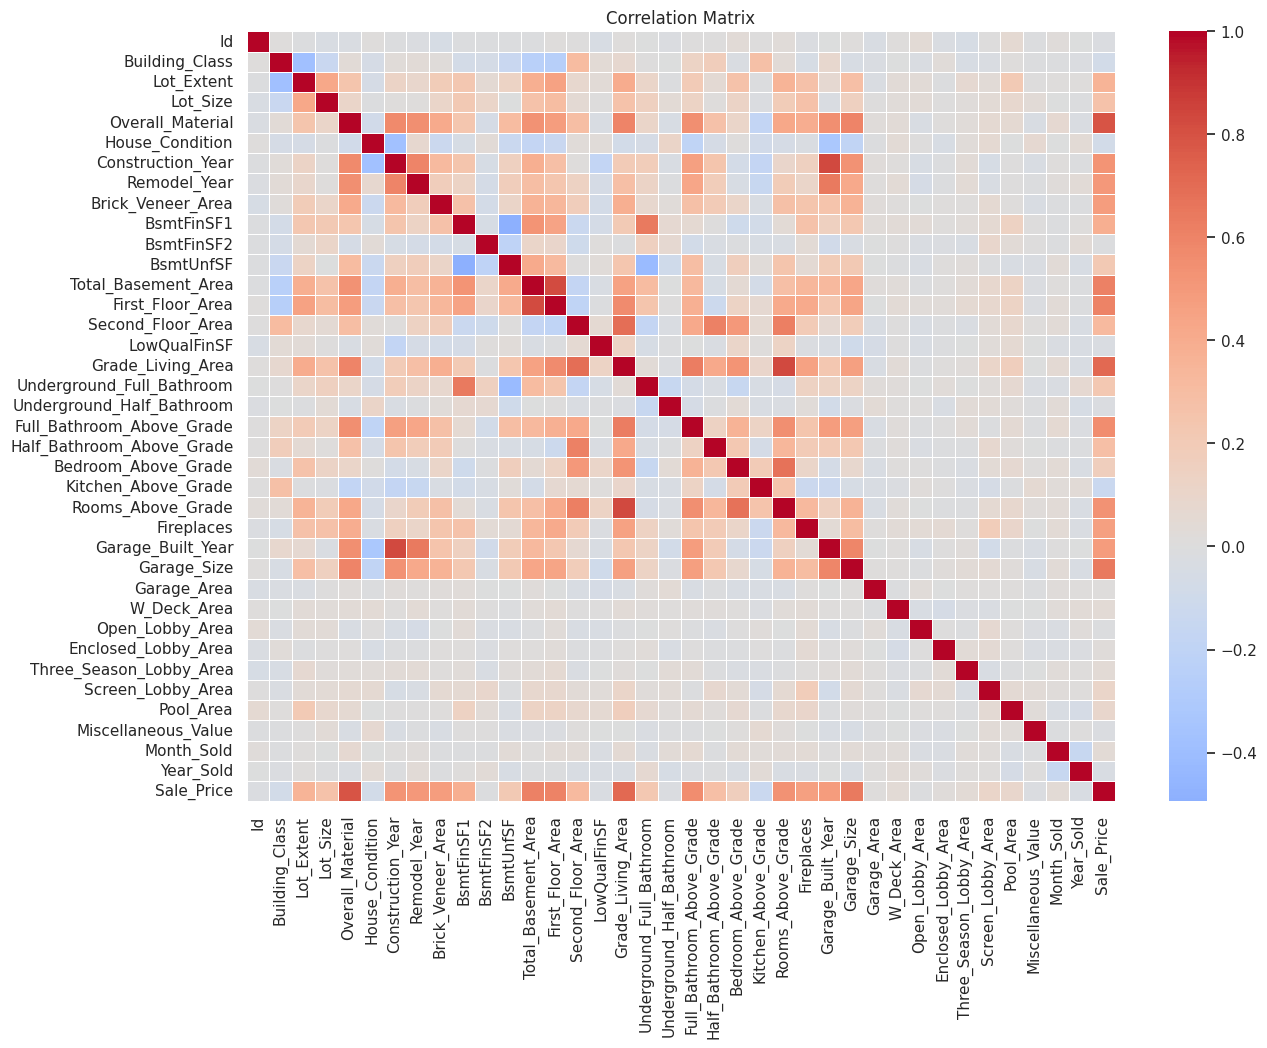

,Sale_Price
Sale_Price,1.000000
Overall_Material,0.790972
Grade_Living_Area,0.708584
Garage_Size,0.640383
Total_Basement_Area,0.613792
First_Floor_Area,0.605971
Full_Bathroom_Above_Grade,0.560604
Rooms_Above_Grade,0.533682
Construction_Year,0.522877
Remodel_Year,0.507015


In [14]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Calculate and visualize the correlation matrix
correlation_matrix = numeric_df.corr()

# Focus on correlations with Sale_Price
correlation_with_sale_price = correlation_matrix['Sale_Price'].sort_values(ascending=False)

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5, center=0)
plt.title('Correlation Matrix')
plt.show()

correlation_with_sale_price

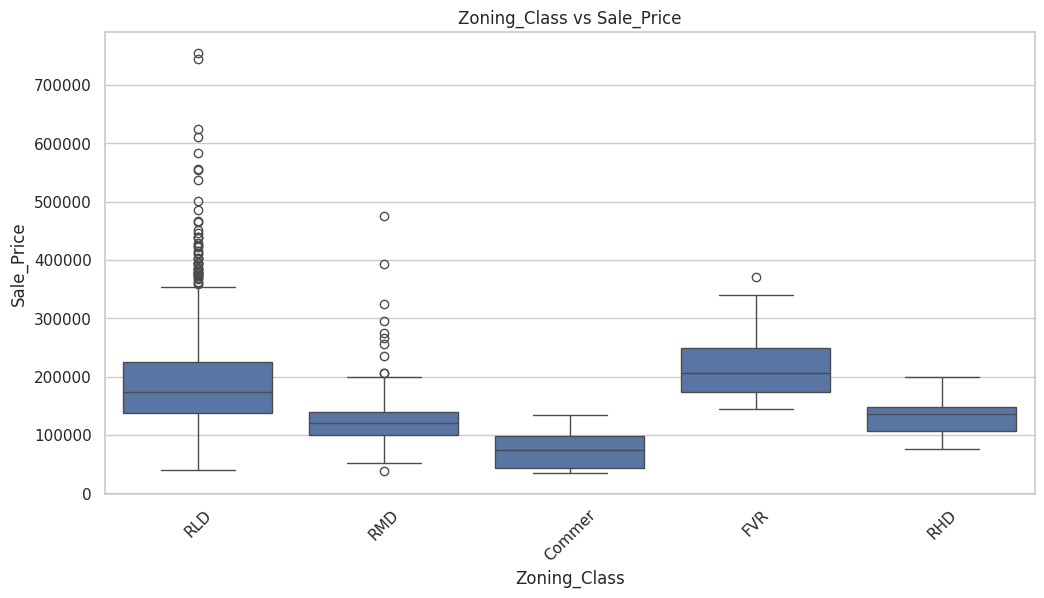

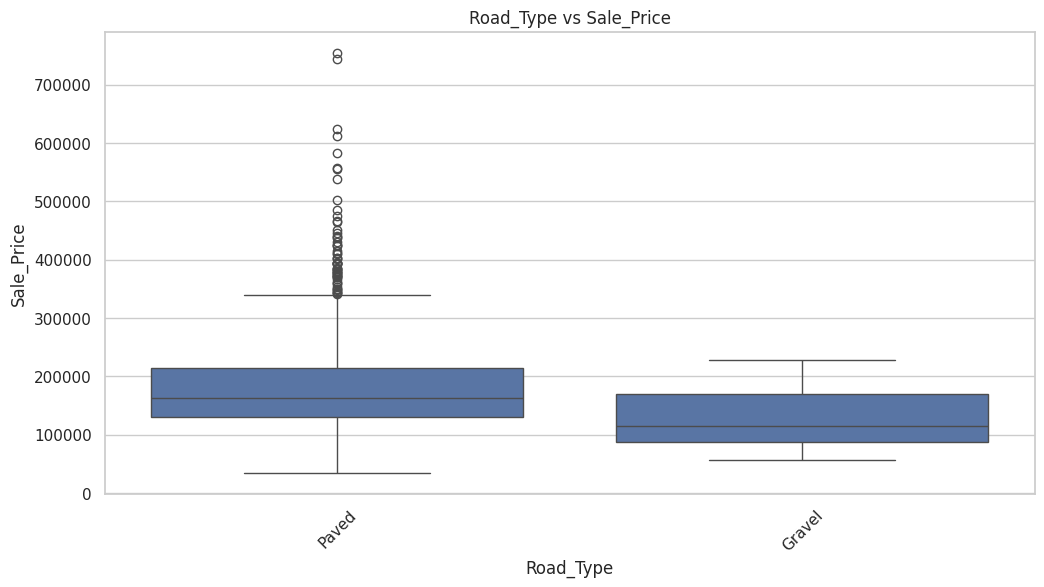

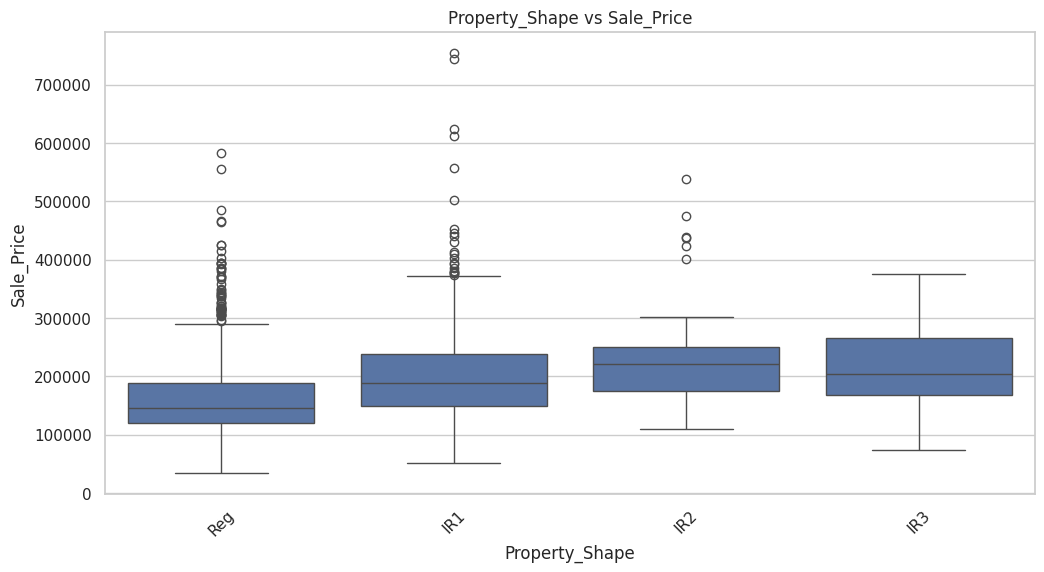

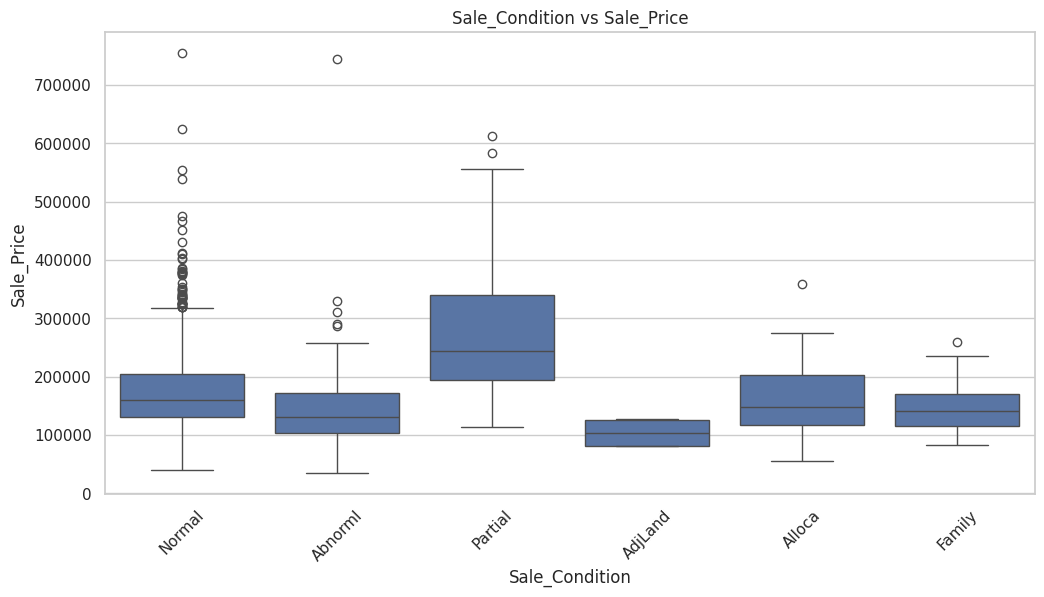

In [15]:
# Visualizing the impact of categorical features on Sale Prices

# Define a function to create boxplots for categorical features
def boxplot_categorical(data, feature, target='Sale_Price', figsize=(12, 6)):
    plt.figure(figsize=figsize)
    sns.boxplot(x=feature, y=target, data=data)
    plt.title(f'{feature} vs {target}')
    plt.xticks(rotation=45)
    plt.show()

# List of categorical features to visualize
categorical_features = ['Zoning_Class', 'Road_Type', 'Property_Shape', 'Sale_Condition']

# Generate boxplots for the selected categorical features
for feature in categorical_features:
    boxplot_categorical(df, feature)


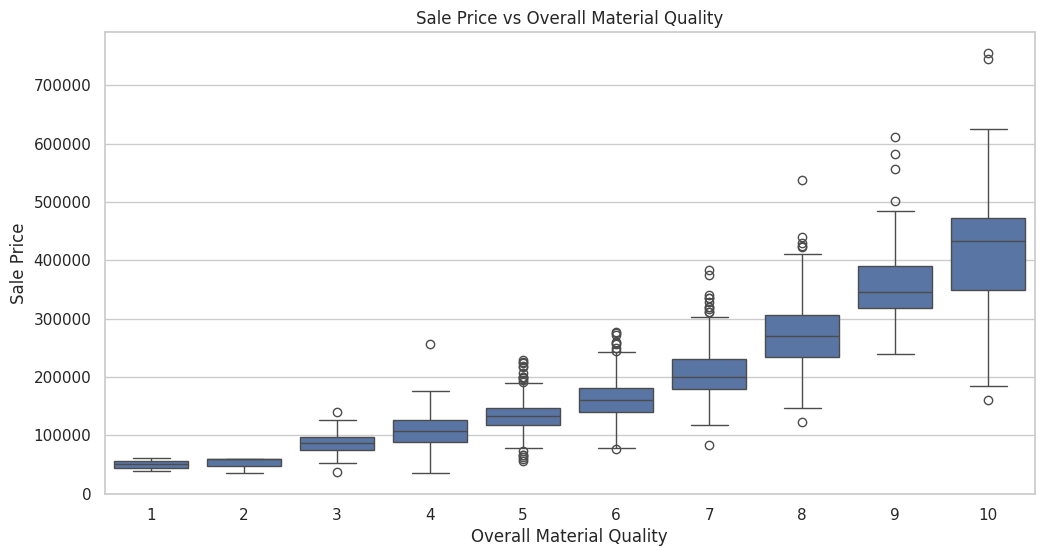

In [16]:
# Relationship between Sale Price and Overall Material Quality
plt.figure(figsize=(12, 6))
sns.boxplot(x='Overall_Material', y='Sale_Price', data=df)
plt.title('Sale Price vs Overall Material Quality')
plt.xlabel('Overall Material Quality')
plt.ylabel('Sale Price')
plt.show()

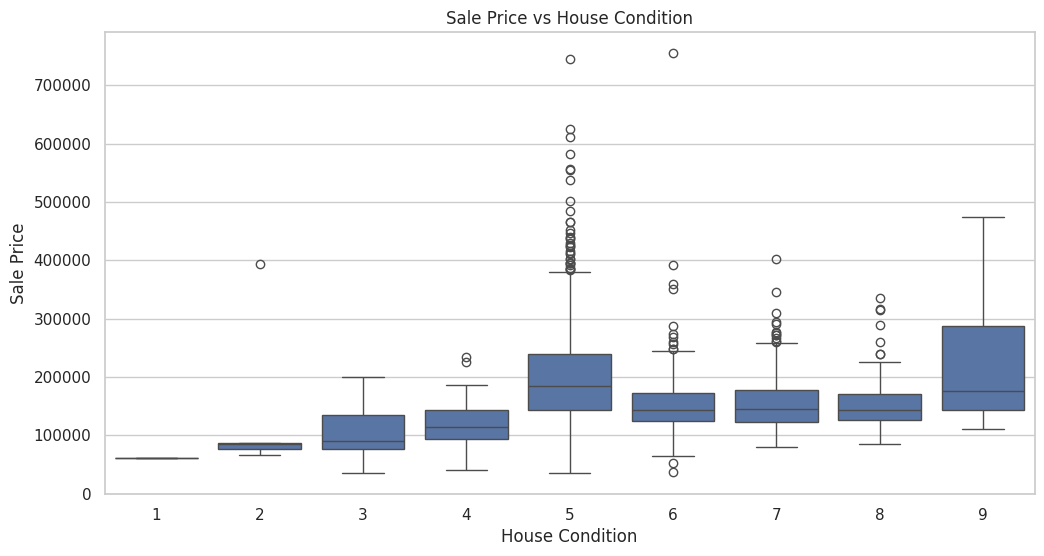

In [17]:
# Relationship between Sale Price and House Condition
plt.figure(figsize=(12, 6))
sns.boxplot(x='House_Condition', y='Sale_Price', data=df)
plt.title('Sale Price vs House Condition')
plt.xlabel('House Condition')
plt.ylabel('Sale Price')
plt.show()


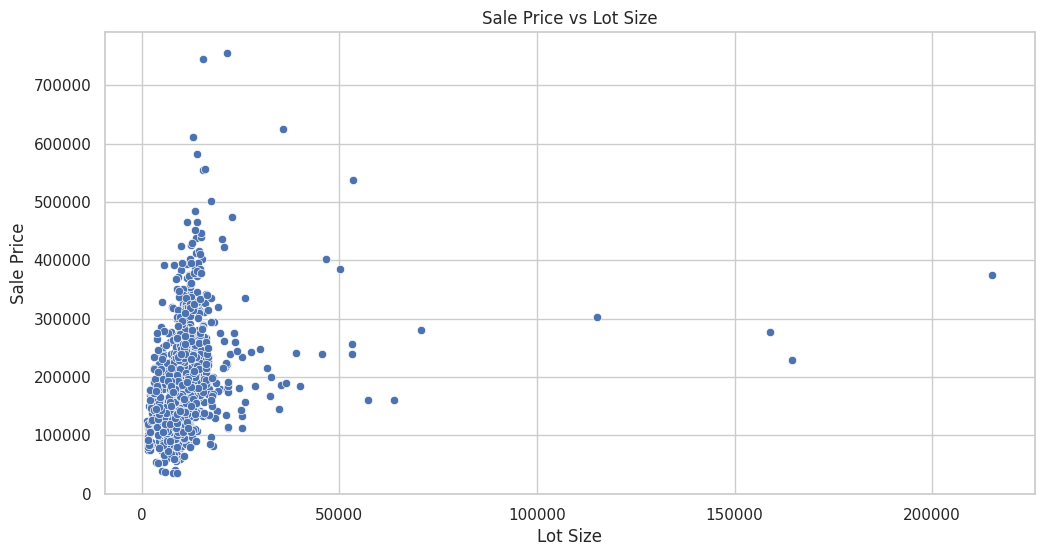

In [18]:
# Scatter plot of Sale Price vs Lot Size
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Lot_Size', y='Sale_Price', data=df)
plt.title('Sale Price vs Lot Size')
plt.xlabel('Lot Size')
plt.ylabel('Sale Price')
plt.show()

This project involves a comprehensive analysis of a real estate dataset to identify trends, patterns, and insights related to property prices, types, and sizes. The analysis includes an exploratory data analysis (EDA) where various statistical methods and visualization techniques are used to examine the relationships between different variables, such as overall material quality, house condition, and lot size, in relation to property prices. The project aims to provide actionable insights for buyers, sellers, and investors by highlighting key factors that influence property values.**bold text**